## A. Временные ряды

Гибридная стратегия
Ограничение времени	300 секунд
Ограничение памяти	512.0 Мб
Ввод	стандартный ввод или input.txt
Вывод	стандартный вывод или output.txt
В этой задаче вам предстоит реализовать гибридную стратегию для прогнозирования временных рядов. В качестве временного ряда будем использовать данные о дневном спросе разных товаров в магазинах, рассматриваем только 1-й товар из 1-го магазина. Чтобы посмотреть на данные локально, можете скачать их отсюда: https://www.kaggle.com/c/demand-forecasting-kernels-only.

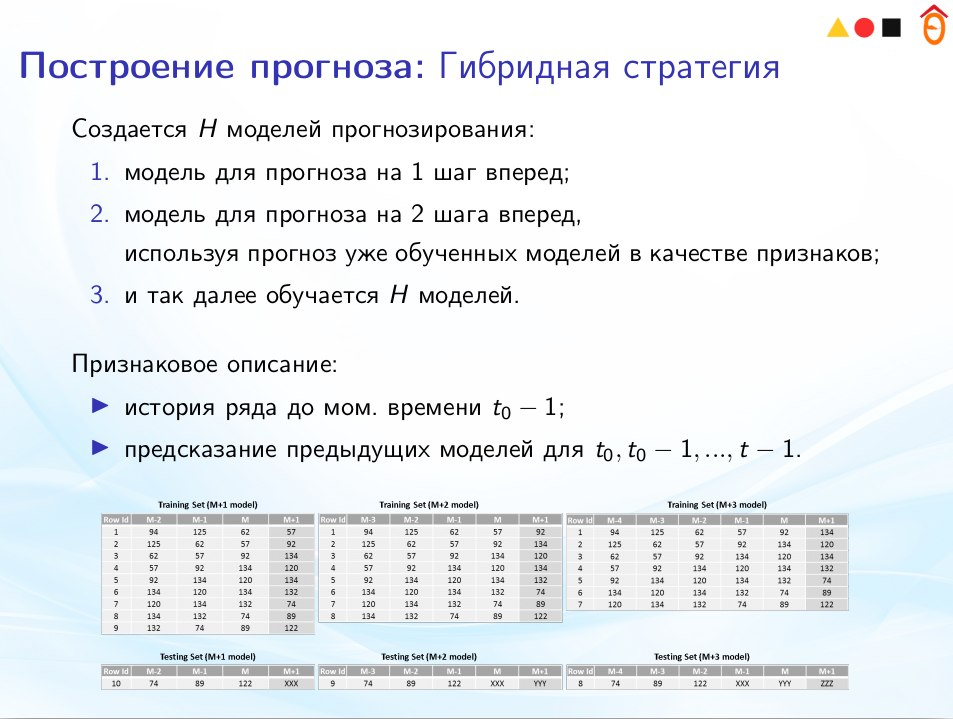

Функция read_timeseries уже реализована. Вы можете использовать ее для локально тестирования.
В функции extract_hybrid_strategy_features необходимо реализовать извлечение фичей из временного ряда согласно гибридной схеме.
Функция build_datasets используется для генерации датасета для каждой модели в гибридной схеме.
Внутри функции predict необходимо реализовать генерацию прогноза с использованием обученных моделей. Обратите внимание, что в процессе генерации новых значений временного ряда необходимо также считать вектор фичей для следующего прогноза. Для этого стоит использовать функцию exrtact_features, переданную в аргументах вызова. Важно: внутри predict нужно вызывать extract_features без параметров со значениями по умолчанию (то есть нужно передавать только timeseries и model_idx).
Реализуйте обучение моделей в теле функции train_models. Можно использовать любые модели из sklearn, например, линейную регрессию или градиентный бустинг. Так же очень полезным может оказаться добавление новых фичей, можете подумать про сезонности и даты. Может быть полезно реализовать новую функцию extract_features, чтобы получить лучший результат.
Функция score_models используется для оценки качества обученных моделей по метрике 
MSE
MSE. Эта функция уже реализована, Вы можете использовать ее для локальной отладки. Баллы за итоговую модель (
55
55 из 
100
100) будут выставляться обратно пропорционально полученному 
MSE
MSE при обучении 
30
30 моделей (model_count=30) - от 
0
0 баллов за 
MSE
⩾
40
MSE⩾40 до 
55
55 баллов за 
MSE
⩽
25
MSE⩽25.
В каждую функцию из шаблона можно добавлять произвольные аргументы с дефолтными значениями.

## Шаблон решения:

Замечания
Присылать нужно только код с реализованными функциями из шаблона с подключением необходимых библиотек. Использовать библиотеки, которых нет в шаблоне, запрещается.
Итоговые баллы выставляются за каждый пройденный тест.

In [1]:
import datetime
import sklearn
import typing as tp
import numpy as np
import pandas as pd


X_type = tp.NewType("X_type", np.ndarray)
X_row_type = tp.NewType("X_row_type", np.ndarray)
Y_type = tp.NewType("Y_type", np.array)
TS_type = tp.NewType("TS_type", pd.Series)
Model_type = tp.TypeVar("Model_type")


def read_timeseries(path_to_df: str = "train.csv") -> TS_type:
    """Функция для чтения данных и получения обучающей и тестовой выборок"""
    df = pd.read_csv(path_to_df)
    df = df[(df['store'] == 1) & (df['item'] == 1)]
    df["date"] = pd.to_datetime(df["date"])
    df = df.set_index("date")
    ts = df["sales"]
    train_ts = ts[:-365]
    test_ts = ts[-365:]
    return train_ts, test_ts


def extract_hybrid_strategy_features(
    timeseries: TS_type,
    model_idx: int,
    window_size: int = 7
) -> X_row_type:
    """
    Функция для получения вектора фичей согласно гибридной схеме. На вход подаётся временной ряд
    до момента T, функция выделяет из него фичи, необходимые модели под номером model_idx для
    прогноза на момент времени T
    
    Args:
        timeseries --- временной ряд до момента времени T (не включительно), pd.Series с датой 
                       в качестве индекса
        model_idx --- индекс модели, то есть номер шага прогноза, 
                      для которого нужно получить признаки, нумерация с нуля
        window_size --- количество последних значений ряда, используемых для прогноза 
                        (без учёта количества прогнозов с предыдущих этапов)

    Returns:
        Одномерный вектор фичей для модели с индексом model_idx (np.array), 
        чтобы сделать прогноз для момента времени T
    """
    feature_window = ... # YOUR CODE HERE
    return timeseries[-feature_window:].values


def build_datasets(
    timeseries: TS_type,
    extract_features: tp.Callable[..., X_row_type],
    window_size: int,
    model_count: int
) -> tp.List[tp.Tuple[X_type, Y_type]]:
    """
    Функция для получения обучающих датасетов согласно гибридной схеме
    
    Args:
        timeseries --- временной ряд
        extract_features --- функция для генерации вектора фичей
        window_size --- количество последних значений ряда, используемых для прогноза
        model_count --- количество моделей, используемых для получения предскзаний 

    Returns:
        Список из model_count датасетов, i-й датасет используется для обучения i-й модели 
        и представляет собой пару из двумерного массива фичей и одномерного массива таргетов
    """
    datasets = []
    
    # YOUR CODE HERE
    
    assert len(datasets) == model_count
    return datasets


def predict(
    timeseries: TS_type,
    models: tp.List[Model_type],
    extract_features: tp.Callable[..., X_row_type] = extract_hybrid_strategy_features
) -> TS_type:
    """
    Функция для получения прогноза len(models) следующих значений временного ряда
    
    Args:
        timeseries --- временной ряд, по которому необходимо сделать прогноз на следующие даты
        models --- список обученных моделей, i-я модель используется для получения i-го прогноза
        extract_features --- функция для генерации вектора фичей. Если вы реализуете свою функцию 
                             извлечения фичей для конечной модели, передавайте этим аргументом.
                             Внутри функции predict функцию extract_features нужно вызывать только
                             с аргументами timeseries и model_idx, остальные должны быть со значениями
                             по умолчанию

    Returns:
        Прогноз len(models) следующих значений временного ряда
    """
    pass


def train_models(
    train_timeseries: TS_type,
    model_count: int
) -> tp.List[Model_type]:
    """
    Функция для получения обученных моделей
    
    Args:
        train_timeseries --- обучающий временной ряд
        model_count --- количество моделей для обучения согласно гибридной схеме.
                        Прогнозирование должно выполняться на model_count дней вперёд

    Returns:
        Список из len(datasets) обученных моделей
    """
    models = []

    # datasets = build_datasets(train_timeseries, ...)
    # YOUR CODE HERE
    
    assert len(models) == len(datasets)
    return models


def score_models(
    train_ts: TS_type,
    test_ts: TS_type, 
    models: tp.List[Model_type],
    predict: tp.Callable[[TS_type, tp.List[Model_type]], TS_type] = predict
):
    """
    Функция для оценки качества обученных моделей по метрике MSE
    
    Args:
        train_ts --- обучающий временной ряд
        test_ts --- тестовый временной ряд
        models --- список обученных моделей
        predict --- функция для получения прогноза временного ряда

    Returns:
        Усредненное MSE для прогноза моделей по всей тестовой выборке
    """
    predict_len = len(models)
    predictions = []
    targets = []

    for i in range(len(test_ts) - predict_len + 1):
        predictions.extend(list(predict(train_ts, models)))
        targets.extend(list(test_ts[i:i+predict_len]))
        train_ts = train_ts.append(test_ts[i:i+1])

    return sklearn.metrics.mean_squared_error(targets, predictions)